In [45]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display
import warnings

import time

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# library options
%matplotlib inline
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

##### Loading Datasets

In [5]:
X_train = pd.read_parquet('../data/final/X_train.parquet')
X_test = pd.read_parquet('../data/final/X_test.parquet')
                      
y_test_class = pd.read_parquet('../data/final/y_test.parquet')['sum_payments_package_key_ltv_class']
y_train_class = pd.read_parquet('../data/final/y_train.parquet')['sum_payments_package_key_ltv_class']


##### Settings for K-Fold Cross-Validation

In [27]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# with transactional features
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train_class, y_test_class), axis=0)

# withhout transactional features
X_train_0 = X_train.drop(['sum_day_1','sum_day_2','sum_day_3','gradient','clumpiness'], axis=1).values
X_test_0 = X_test.drop(['sum_day_1','sum_day_2','sum_day_3','gradient','clumpiness'], axis=1).values

inputs_0 = np.concatenate((X_train_0, X_test_0), axis=0)



### AdaBoost Classifcation

##### K-Fold Cross-Validation

In [30]:
# K-fold Cross Validation model evaluation
fold_no = 1

# Initalize empty scores list
scores = np.zeros(shape=(2,num_folds))

for train, test in kfold.split(inputs, targets):
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Chosing Model
    model = AdaBoostClassifier()
    model.fit(inputs[train], targets[train])

    y_predict = model.predict(inputs[test])

    # filling scores list with the chosen sco
    scores[0,fold_no -1] = metrics.accuracy_score(targets[test], y_predict)
    scores[1,fold_no -1] = metrics.cohen_kappa_score(targets[test], y_predict)
    # Increase fold number
    fold_no = fold_no + 1
    
scores_ada = scores

print('Accuracy Score ---- mean: ',scores_ada[0].mean(), '--- std: ',scores_ada[0].std())
print('Cohen Kappa Score ---- mean: ',scores_ada[1].mean(), '--- std: ',scores_ada[1].std())


------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Score ---- mean:  0.

##### Without transactional features

In [12]:
# K-fold Cross Validation model evaluation
fold_no = 1

# Initalize empty scores list
scores = np.zeros(shape=(2,num_folds))

for train, test in kfold.split(inputs_0, targets):
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Chosing Model
    model = AdaBoostClassifier()
    model.fit(inputs_0[train], targets[train])

    y_predict = model.predict(inputs_0[test])

    # filling scores list with the chosen sco
    scores[0,fold_no -1] = accuracy_score(targets[test], y_predict)
    scores[1,fold_no -1] = metrics.cohen_kappa_score(targets[test], y_predict)
    
    # Increase fold number
    fold_no = fold_no + 1
    
scores_ada = scores
print('--------------WITHOUT TRANSACTIONAL FEATURES-----------')
print('Accuracy Score ---- mean: ',scores_ada[0].mean(), '--- std: ',scores_ada[0].std())
print('Cohen Kappa Score ---- mean: ',scores_ada[1].mean(), '--- std: ',scores_ada[1].std())

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
--------------WITHOUT TRANSACTIONAL FEATURES-----------
Accuracy Score ---- mean:  0.6615332242031394 --- std:  0.008783077500023606
Cohen Kappa Score ---- mean:  0.48902547945126273 --- std:  0.019234029782506212


### Gradient Boosting Classifcation

##### K-Fold Cross-Validation

In [31]:
# K-fold Cross Validation model evaluation
fold_no = 1

# Initalize empty scores list
scores = np.zeros(shape=(2,num_folds))

for train, test in kfold.split(inputs, targets):
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Chosing Model
    model = GradientBoostingClassifier()
    model.fit(inputs[train], targets[train])

    y_predict = model.predict(inputs[test])
    y_predict_clipped = y_predict.clip(min=0) # setting min value to zero  (requirement for log_error)

    # filling scores list with the chosen sco
    scores[0,fold_no -1] = accuracy_score(targets[test], y_predict)
    scores[1,fold_no -1] = metrics.cohen_kappa_score(targets[test], y_predict)
    
    # Increase fold number
    fold_no = fold_no + 1
    
scores_gb = scores

print('Accuracy Score ---- mean: ',scores_gb[0].mean(), '--- std: ',scores_gb[0].std())
print('Cohen Kappa Score ---- mean: ',scores_gb[1].mean(), '--- std: ',scores_gb[1].std())


------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Score ---- mean:  0.

##### Without transactional features

In [15]:
# K-fold Cross Validation model evaluation
fold_no = 1

# Initalize empty scores list
scores = np.zeros(shape=(2,num_folds))

for train, test in kfold.split(inputs_0, targets):
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Chosing Model
    model = GradientBoostingClassifier()
    model.fit(inputs_0[train], targets[train])

    y_predict = model.predict(inputs_0[test])
    y_predict_clipped = y_predict.clip(min=0) # setting min value to zero  (requirement for log_error)

    # filling scores list with the chosen sco
    scores[0,fold_no -1] = accuracy_score(targets[test], y_predict)
    scores[1,fold_no -1] = metrics.cohen_kappa_score(targets[test], y_predict)
    
    # Increase fold number
    fold_no = fold_no + 1
    
scores_gb = scores
print('--------------WITHOUT TRANSACTIONAL FEATURES-----------')
print('Accuracy Score ---- mean: ',scores_gb[0].mean(), '--- std: ',scores_gb[0].std())
print('Cohen Kappa Score ---- mean: ',scores_gb[1].mean(), '--- std: ',scores_gb[1].std())

------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
--------------WITHOUT TRANSACTIONAL FEATURES-----------
Accuracy Score ---- mean:  0.8532406841040265 --- std:  4.398742882011364e-05
Cohen Kappa Score ---- mean:  0.7772502143732426 --- std:  2.9936743911607167e-06


### XGBoost Classifcation

#### Hyperparameter Tuning with RandomSearch

In [20]:
params = { 'max_depth': [2,3,4],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'n_estimators': [50, 100, 150, 200],
    'reg_alpha': [0, 0.5, 1.2,],
    'reg_lambda': [0, 0.5, 1, 1.2]}
    
xgbr = xgb.XGBClassifier(eval_metric='mlogloss')
    
xgb_search = RandomizedSearchCV(estimator=xgbr,
                    cv=2,
                    param_distributions=params,
                    scoring='accuracy',
                    n_iter=15,
                    
                    verbose=2)
                    
xgb_search.fit(X_train.values, y_train_class.values)
                    
print("Best parameters:", xgb_search.best_params_)
print("Best Accuracy: ", (xgb_search.best_score_))

df = pd.DataFrame(xgb_search.cv_results_)

df[['param_n_estimators',
'param_learning_rate',
'param_max_depth', 
'param_colsample_bytree', 
'param_colsample_bylevel',
'param_subsample',
'param_reg_lambda',
'mean_test_score']].sort_values(by ='mean_test_score', ascending=False)[0:30]

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV] END colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.2, max_depth=2, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7999999999999999; total time=  47.2s
[CV] END colsample_bylevel=0.5, colsample_bytree=0.7999999999999999, learning_rate=0.2, max_depth=2, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7999999999999999; total time=  38.8s
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8999999999999999; total time=  29.1s
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8999999999999999; total time=  33.1s
[CV] END colsample_bylevel=0.7999999999999999, colsample_bytree=0.7, learning_rate=0.2, max_depth=2, n_estimators=100, reg_alpha=1.2, reg_lambda=1.2, subsample

KeyError: "['param_class_alpha'] not in index"

##### Hyperparameter Tuning with GridSerach

In [ ]:
#X_train_down, y_train_down =resample(X_train, y_train_class, replace = False, n_samples=50000, random_state=42)

from sklearn.model_selection import ShuffleSplit

estimator = xgb.XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')

param_set = {
    'n_estimators': [25,50,100,200,300,400,500,600,700],
    #'eta': [0.1],
    'max_depth': [2, 4, 8, 16],
    #'reg_alpha': [0, 0.5, 1],
    #'reg_lambda': [0, 0.5, 1],
    #'colsample_bytree': [0.7],
   # 'subsample': [0.7, 0.8]
}

scores = ['accuracy']


xgb_grid = GridSearchCV(estimator=estimator, param_grid = param_set, refit='accuracy', cv=2, scoring=scores, return_train_score=False, verbose=2)

## instead of cv: ShuffleSplit(test_size=0.20, n_splits=1, random_state=0)

xgb_grid.fit(X_train.values, y_train_class.values)


df_grid = pd.DataFrame(xgb_grid.cv_results_)

df_grid.to_pickle("xgb_grid_2.pickle")

##### K-Fold Cross-Validation

In [32]:
# K-fold Cross Validation model evaluation
fold_no = 1

# Initalize empty scores list
scores = np.zeros(shape=(2,num_folds))

for train, test in kfold.split(inputs, targets):
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Chosing Model
    param_best = xgb_search.best_params_
    model = xgb.XGBClassifier(eval_metric='mlogloss', **param_best)
    model.fit(inputs[train], targets[train])

    y_predict = model.predict(inputs[test])


    # filling scores list with the chosen sco
    scores[0,fold_no -1] = accuracy_score(targets[test], y_predict)
    scores[1,fold_no -1] = metrics.cohen_kappa_score(targets[test], y_predict)
    
    # Increase fold number
    fold_no = fold_no + 1
    
scores_xgb = scores

print('Accuracy Score ---- mean: ',scores_xgb[0].mean(), '--- std: ',scores_xgb[0].std())
print('Cohen Kappa Score ---- mean: ',scores_xgb[1].mean(), '--- std: ',scores_xgb[1].std())


------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------
Training for fold 2 ...
------------------------------------------------------------------------
Training for fold 3 ...
------------------------------------------------------------------------
Training for fold 4 ...
------------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Training for fold 6 ...
------------------------------------------------------------------------
Training for fold 7 ...
------------------------------------------------------------------------
Training for fold 8 ...
------------------------------------------------------------------------
Training for fold 9 ...
------------------------------------------------------------------------
Training for fold 10 ...
Accuracy Score ---- mean:  0.

##### Feature Importance

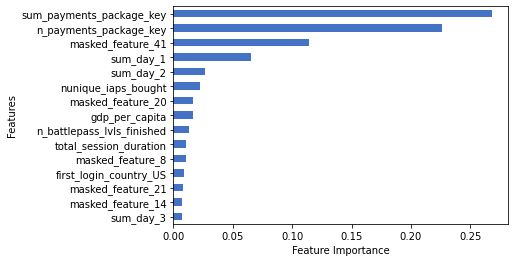

In [49]:
clf = xgb.XGBClassifier(eval_metric='mlogloss', **param_best)
clf.fit(X_train.values, y_train_class)


feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)

feat_importances.sort_values(ascending=True).nlargest(15).plot(kind='barh', color = '#4472C4')
plt.gca().invert_yaxis()
#plt.title('Feature Importance for XGBoost')
plt.ylabel('Features')
plt.xlabel('Feature Importance')

plt.savefig('../pictures/xgb_importance.png')

plt.show()

##### Confusion Matrix

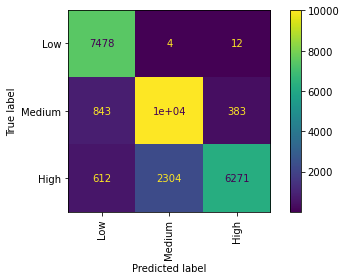

In [47]:
y_pred_c = clf.predict(X_test.values)

cm = confusion_matrix(y_test_class, y_pred_c)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low','Medium','High'])
disp.plot()
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../pictures/xgb_Class_Confusion.png')
plt.show()

##### Without transactional features

In [29]:
# K-fold Cross Validation model evaluation
fold_no = 1

# Initalize empty scores list
scores = np.zeros(shape=(2,num_folds))

for train, test in kfold.split(inputs_0, targets):
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Chosing Model
    param_best = xgb_search.best_params_
    model = xgb.XGBClassifier(eval_metric='mlogloss', **param_best)

    y_predict = model.predict(inputs_0[test])
    y_predict_clipped = y_predict.clip(min=0) # setting min value to zero  (requirement for log_error)

    # filling scores list with the chosen sco
    scores[0,fold_no -1] = accuracy_score(targets[test], y_predict)
    scores[1,fold_no -1] = metrics.cohen_kappa_score(targets[test], y_predict)
    
    # Increase fold number
    fold_no = fold_no + 1
    
scores_gb = scores
print('--------------WITHOUT TRANSACTIONAL FEATURES-----------')
print('Accuracy Score ---- mean: ',scores_gb[0].mean(), '--- std: ',scores_gb[0].std())
print('Cohen Kappa Score ---- mean: ',scores_gb[1].mean(), '--- std: ',scores_gb[1].std())

------------------------------------------------------------------------
Training for fold 1 ...


NotFittedError: need to call fit or load_model beforehand

### Comparing Algorithms in plot

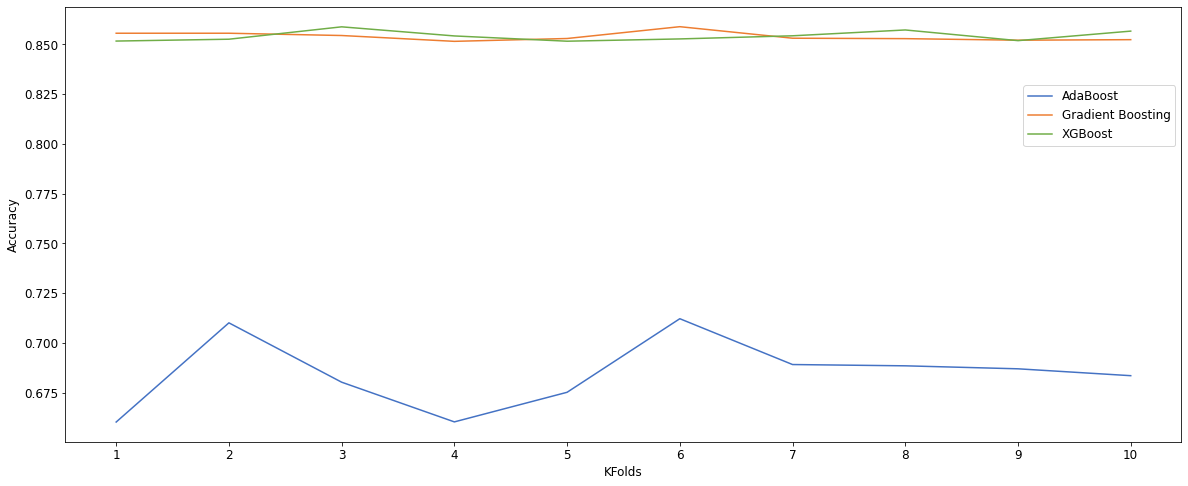

In [39]:
plt.figure(figsize=(20, 8))
#Create the plots


plt.plot(range(1,len(scores_ada[0])+1),scores_ada[0], color='#4472C4', label = 'AdaBoost')
plt.plot(range(1,len(scores_gb[0])+1),scores_gb[0], color='#ED7D31', label = 'Gradient Boosting')
plt.plot(range(1,len(scores_xgb[0])+1),scores_xgb[0], color='#70AD47', label = 'XGBoost')

#plt.plot(range(1,len(scores)+1),sparse_categorical_crossentropy, color='blue', label = 'sparse_categorical_crossentropy')
#Create the title, axis description and legend
#plt.title('Accuracy Results KFOLD Cross-Validation')
plt.ylabel('Accuracy')
plt.xlabel("KFolds")
plt.legend(loc=7, bbox_to_anchor=(1,0.75))
#plt.grid()
plt.xticks(range(1,len(scores_ada[0])+1),rotation = 0)
plt.rcParams.update({'font.size': 12})
plt.savefig('../pictures/accuracy_boosting.png')


In [35]:
scores_ada

array([[0.66015457, 0.71003292, 0.68019178, 0.66022613, 0.67511092,
        0.7121082 , 0.68906541, 0.68842135, 0.68691856, 0.68346096],
       [0.48540783, 0.56376642, 0.51481546, 0.48492046, 0.50631322,
        0.56591588, 0.53251835, 0.5288877 , 0.52812555, 0.52280298]])